In [6]:
# Importing some common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:


# For statistical tests
import scipy.stats as stats

# For spilliting the data and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For sampling
from imblearn.over_sampling import SMOTE

# for model building
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

# For evaluation
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import recall_score,precision_score

# About the Data
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Data Reading and basic eyeballing

In [8]:
# Reading the data
df=pd.read_csv("D:\\Machine Learning Projects\\Project\\Credit Card Fraud Detection\\creditcard.csv")

In [9]:
# First five rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# shape of the data
df.shape

(284807, 31)

In [11]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
# Checking for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
# Data has no missing values

In [14]:
# Checking for imbalance of the target variable
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

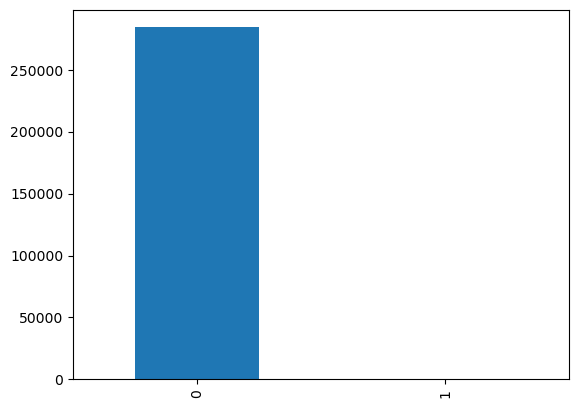

In [15]:
df.Class.value_counts().plot.bar()
plt.show()

In [16]:
# We see that the target variable is highly imbalanced. We may have to imply oversampling techniques to counter this

In [17]:
# Since the data is masked, doing exploratory Data Analysis wouldn't make sense

In [18]:
# We will go ahead with feature selection

In [19]:
# Distribution of the variables

# Feature Selection

In [20]:
# Taking significance level at 0.05

stat_df=pd.DataFrame() # making an empty dataframe to store name of feature and pvalue
stat_df['Feature']=df.drop(columns='Class').columns
pvalue=[]

for i in df.drop(columns='Class').columns:
    # Null Hypothesis: 'i' has no impact on the target variable
    # Alternate Hypothesis: 'i' has an impact on the target variable
    class_1=df.loc[df.Class==1,i]
    class_0=df.loc[df.Class==0,i]
    pvalue.append(stats.ttest_ind(class_1,class_0)[1])

stat_df['Pvalue']=pvalue

In [21]:
selected_features=stat_df.loc[stat_df.Pvalue<0.05]['Feature'].values

# Base Model

In [22]:
# We will proceed with a base model of linear regression

# Splitting the data
x=df[selected_features]
y=df.Class
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,stratify=y)

In [23]:
x_train.shape,x_test.shape

((199364, 27), (85443, 27))

In [24]:
# Scaling the data
sc=StandardScaler()
x_train_s=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test_s=pd.DataFrame(sc.transform(x_test),columns=x_test.columns)

In [25]:
# Adding constant column in x_train and x_test
x_train_s=sm.add_constant(x_train_s)
x_test_s=sm.add_constant(x_test_s)

In [26]:
y_train=y_train.reset_index().drop(columns='index')
y_test=y_test.reset_index().drop(columns='index')

Accuracy Score: 0.9960558500988963
f1_score: 0.43361344537815133
Precision: 0.28859060402684567
Recall: 0.8716216216216216
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.29      0.87      0.43       148

    accuracy                           1.00     85443
   macro avg       0.64      0.93      0.72     85443
weighted avg       1.00      1.00      1.00     85443



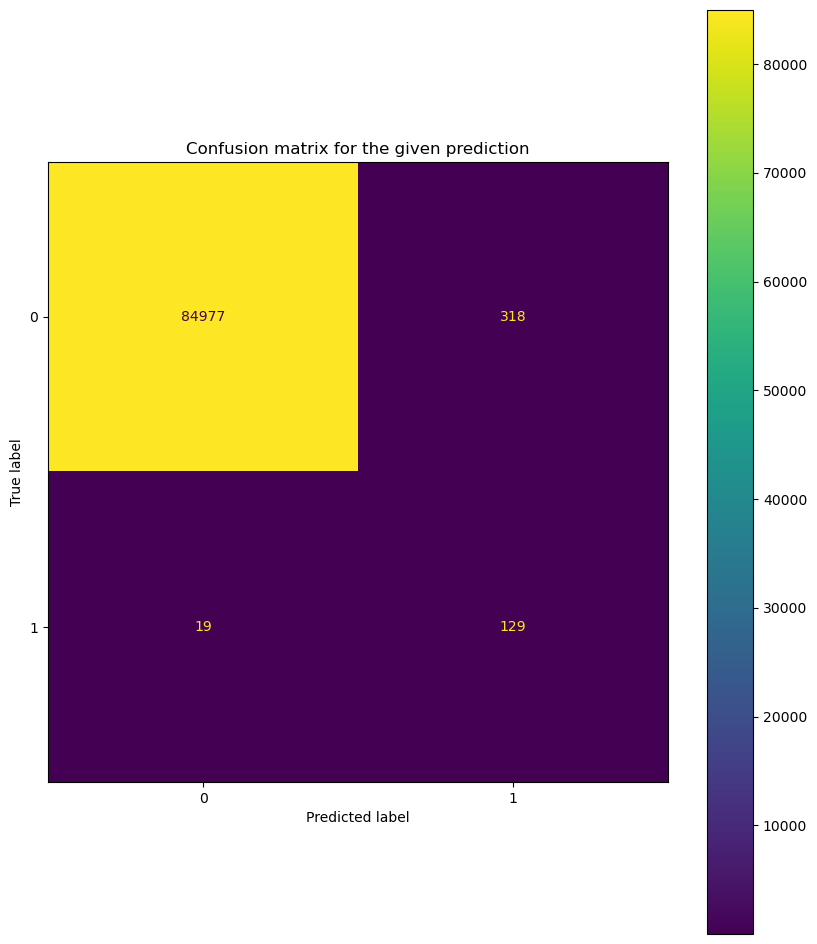

In [48]:
# before model bulding we will build an evaluation function

def evaluation(y_test,y_pred):
    
    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('f1_score:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Classification report:\n',classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion matrix for the given prediction')
    plt.show()
evaluation(y_test,y_pred)   
# Our evaluation fucntion is now created

In [28]:
# Fitting a model
base_model=sm.Logit(y_train,x_train_s).fit()
y_pred_proba=base_model.predict(x_test_s)

Optimization terminated successfully.
         Current function value: 0.004091
         Iterations 13


In [29]:
# Summary of the model
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                          Logit   Df Residuals:                   199336
Method:                           MLE   Df Model:                           27
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:                  0.6779
Time:                        14:25:08   Log-Likelihood:                -815.57
converged:                       True   LL-Null:                       -2532.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5074      0.162    -52.409      0.000      -8.826      -8.189
Time          -0.0625      0.118     -0.528      0.598      -0.295       0.170
V1             0.2870      0.098      2.943      0.003       0.096       0.478
V2            -0.0455      0.118     -0.385      0.700      -0.277       0.186
V3             0.0214      0.093      0.229      0.819      -0.161       0.204
V4             0.9956      0.122      8.180      0.000       0.757       1.234
V5             0.1962      0.105      1.865      0.062      -0.010       0.402
V6            -0.0881      0.106     -0.829      0.407      -0.296       0.120
V7            -0.1525      0.098     -1.555      0.120      -0.345       0.040
V8            -0.1969      0.042     -4.726      0.000      -0.278      -0.115
V9            -0.3608      0.137     -2.627      0.009      -0.630      -0.092
V10           -0.9429      0.119     -7.921      0.000      -1.176      -0.710
V11            0.0099      0.096      0.103      0.918      -0.178       0.198
V12            0.0461      0.100      0.462      0.644      -0.150       0.242
V13           -0.2770      0.094     -2.935      0.003      -0.462      -0.092
V14           -0.4640      0.068     -6.862      0.000      -0.597      -0.331
V15           -0.1682      0.093     -1.811      0.070      -0.350       0.014
V16           -0.2201      0.114     -1.923      0.054      -0.444       0.004
V17           -0.0355      0.070     -0.507      0.612      -0.172       0.102
V18            0.0098      0.118      0.083      0.934      -0.221       0.241
V19            0.0842      0.090      0.938      0.348      -0.092       0.260
V20           -0.4100      0.074     -5.505      0.000      -0.556      -0.264
V21            0.1515      0.034      4.422      0.000       0.084       0.219
V24            0.0964      0.102      0.941      0.347      -0.104       0.297
V26            0.0485      0.100      0.483      0.629      -0.148       0.245
V27           -0.3866      0.058     -6.693      0.000      -0.500      -0.273
V28           -0.1134      0.033     -3.468      0.001      -0.178      -0.049
Amount         0.2298      0.118      1.953      0.051      -0.001       0.460
==============================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [30]:
y_pred=[]

# Taking threshold for probability at 0.5
for i in y_pred_proba:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Accuracy Score: 0.9992977774656788
f1_score: 0.7709923664122138
Precision: 0.8859649122807017
Recall: 0.6824324324324325
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.68      0.77       148

    accuracy                           1.00     85443
   macro avg       0.94      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443



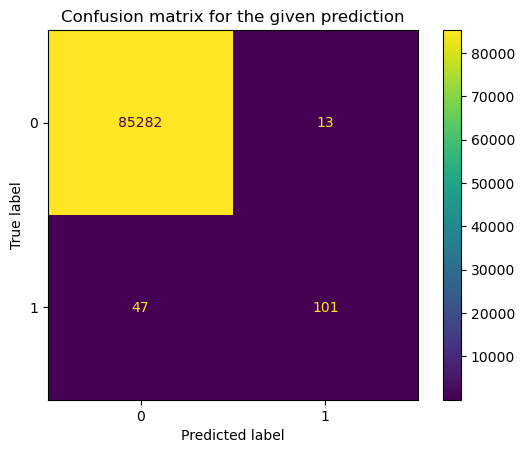

In [31]:
# Evaluating the model
evaluation(y_test,y_pred)

#### We observe that we get an excellent accuracy score of 99.9% but a poor recall score. This due to the high imbalance in the target class. We will try some oversampling techniques to see if we can counter this.

# SMOTE

In [32]:
x_train_sampled,y_train_sampled=SMOTE().fit_resample(x_train_s,y_train)

In [33]:
# we now have an oversampled training set
# We will apply the Logistic regression model again

In [34]:
model=sm.Logit(y_train_sampled,x_train_sampled).fit()
y_pred_proba=model.predict(x_test_s)

Optimization terminated successfully.
         Current function value: 0.135338
         Iterations 14


In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               398040
Model:                          Logit   Df Residuals:                   398012
Method:                           MLE   Df Model:                           27
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:                  0.8047
Time:                        14:25:14   Log-Likelihood:                -53870.
converged:                       True   LL-Null:                   -2.7590e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4942      0.015   -227.538      0.000      -3.524      -3.464
Time          -0.3466      0.012    -29.072      0.000      -0.370      -0.323
V1             0.8046      0.018     43.558      0.000       0.768       0.841
V2            -0.1335      0.018     -7.520      0.000      -0.168      -0.099
V3             0.0350      0.012      2.945      0.003       0.012       0.058
V4             1.2942      0.011    114.728      0.000       1.272       1.316
V5             0.6027      0.012     52.220      0.000       0.580       0.625
V6            -0.3687      0.012    -31.881      0.000      -0.391      -0.346
V7             0.0264      0.011      2.397      0.017       0.005       0.048
V8            -0.6628      0.011    -59.707      0.000      -0.685      -0.641
V9            -0.4441      0.014    -31.106      0.000      -0.472      -0.416
V10           -0.8541      0.020    -43.677      0.000      -0.892      -0.816
V11            0.4713      0.012     40.238      0.000       0.448       0.494
V12           -1.0665      0.015    -69.585      0.000      -1.097      -1.036
V13           -0.4022      0.008    -49.276      0.000      -0.418      -0.386
V14           -1.1849      0.015    -76.517      0.000      -1.215      -1.155
V15           -0.1672      0.009    -19.586      0.000      -0.184      -0.150
V16           -0.4264      0.014    -31.574      0.000      -0.453      -0.400
V17           -0.5792      0.018    -32.785      0.000      -0.614      -0.545
V18           -0.1656      0.012    -14.368      0.000      -0.188      -0.143
V19            0.2430      0.009     26.415      0.000       0.225       0.261
V20           -0.2423      0.013    -18.845      0.000      -0.268      -0.217
V21            0.1103      0.008     14.375      0.000       0.095       0.125
V24            0.0185      0.010      1.908      0.056      -0.001       0.037
V26           -0.2796      0.010    -27.746      0.000      -0.299      -0.260
V27            0.0606      0.012      5.121      0.000       0.037       0.084
V28            0.1805      0.011     16.734      0.000       0.159       0.202
Amount         0.4228      0.021     20.176      0.000       0.382       0.464
==============================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [36]:
y_pred=[]

# Taking threshold for probability at 0.5
for i in y_pred_proba:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Accuracy Score: 0.975234951956275
f1_score: 0.11390284757118928
Precision: 0.060714285714285714
Recall: 0.918918918918919
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.92      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



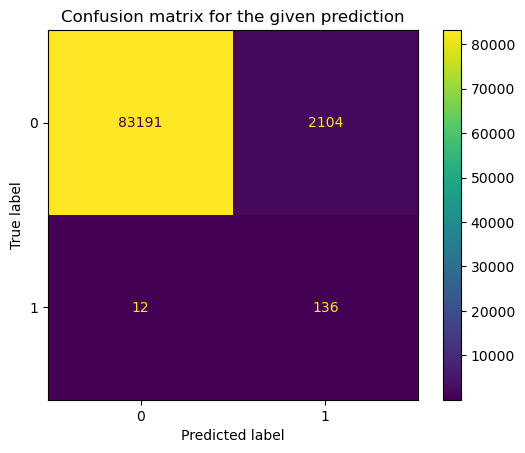

In [37]:
# Evaluation of the model
evaluation(y_test,y_pred)

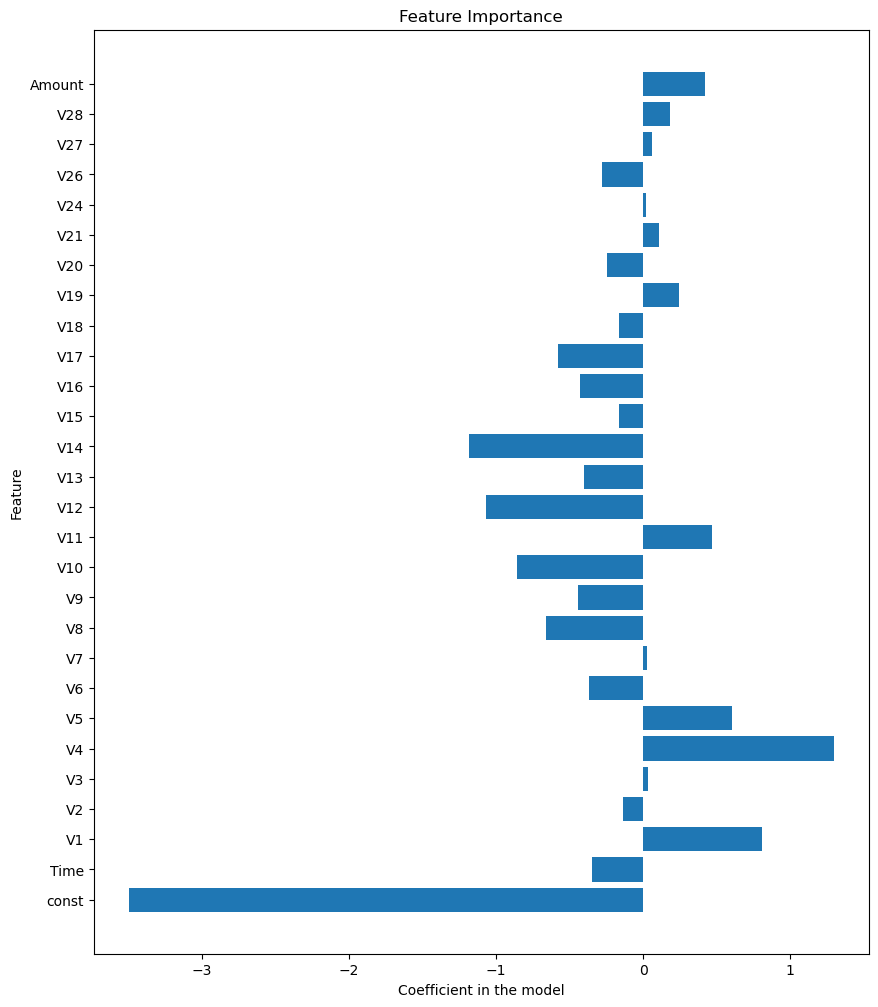

In [38]:
plt.rcParams['figure.figsize']=[10,12]
plt.barh(y=model.params.index,width=model.params.values)
plt.title('Feature Importance')
plt.ylabel('Feature')
plt.xlabel('Coefficient in the model')
plt.show()

#### We observe that our recall score has imporved considerably in case of a Logistic Regression model. We will further see whether our model could improve through some tree based models.

# Decision Tree

In [39]:
# Since we are using decision tree we won't be needing to scale the split

In [40]:
# We will usie smote to resample the data again
x_train_sampled,y_train_sampled=SMOTE().fit_resample(x_train,y_train)

In [41]:
dtree=DecisionTreeClassifier(max_depth=5)
dt_model=dtree.fit(x_train_sampled,y_train_sampled)
y_pred=dt_model.predict(x_test)

Accuracy Score: 0.9805250283814941
f1_score: 0.13513513513513514
Precision: 0.0731981981981982
Recall: 0.8783783783783784
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.14       148

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443



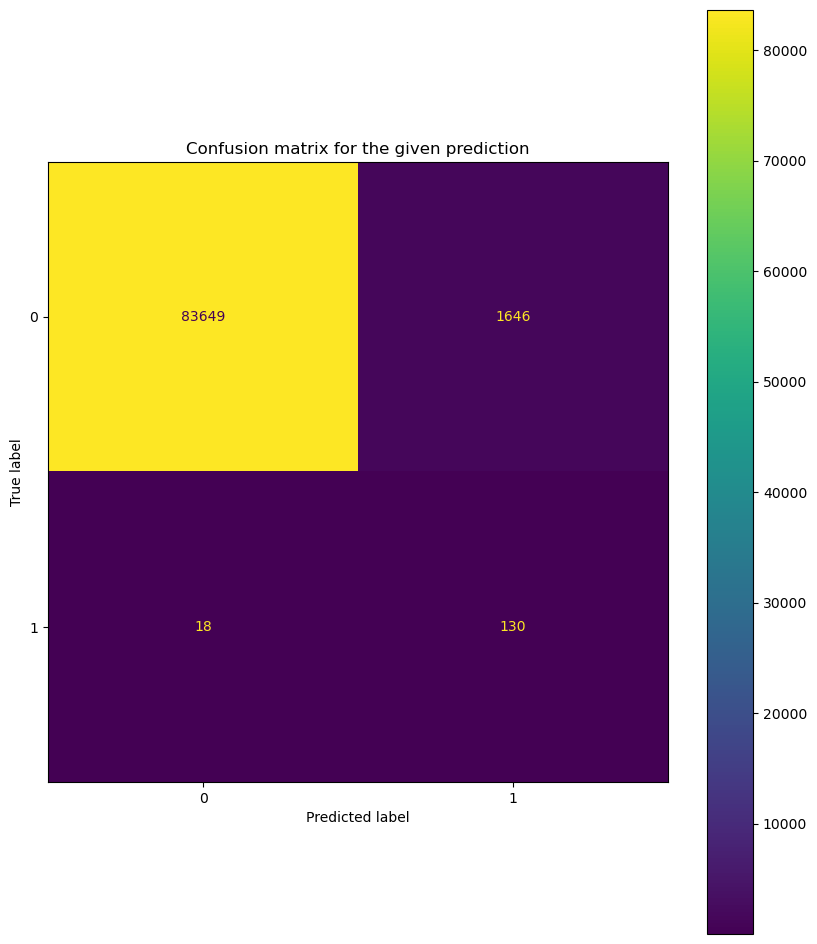

In [42]:
# Evaluating the model
evaluation(y_test,y_pred)

#### We observe that Decision Tree performs worse than Losgistic Regression. We will now see whether bossting methods actually have a positive effect on the oversampled train data.

# Boosting

In [43]:
# For the boosting technique we will use the lightgbm framework

In [44]:
lgbm=LGBMClassifier() # Going with default parameters
lg_model=lgbm.fit(x_train_sampled,y_train_sampled)
y_pred=lg_model.predict(x_test)

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Accuracy Score: 0.9991222218320986
f1_score: 0.7678018575851393
Precision: 0.7085714285714285
Recall: 0.8378378378378378
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.71      0.84      0.77       148

    accuracy                           1.00     85443
   macro avg       0.85      0.92      0.88     85443
weighted avg       1.00      1.00      1.00     85443



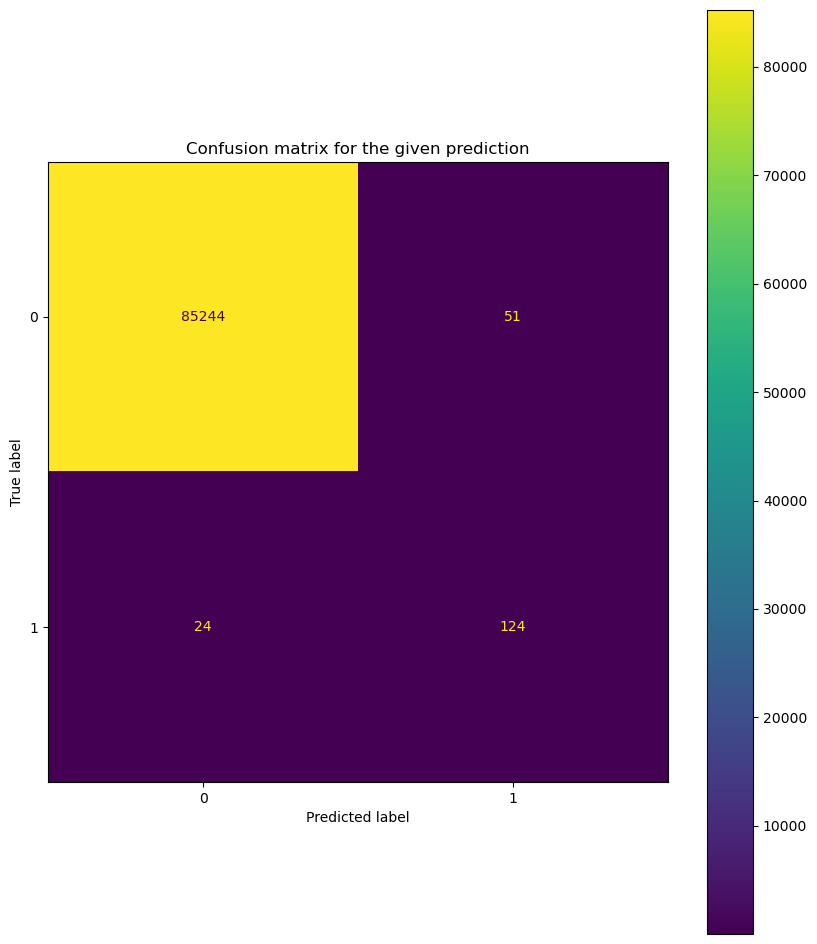

In [45]:
# Model evaluation
evaluation(y_test,y_pred)

#### We observe that the lightgbm model is performing poorly compared to Decision Tree in terms of recall score, but has a much better f1-score. Let us see whether we can improve the performance of the lightgbm model by increasing the weight of the positive class

In [46]:
lgbm=LGBMClassifier(scale_pos_weight=100)
lg_model=lgbm.fit(x_train_sampled,y_train_sampled)
y_pred=lg_model.predict(x_test)

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.114515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Accuracy Score: 0.9960558500988963
f1_score: 0.43361344537815133
Precision: 0.28859060402684567
Recall: 0.8716216216216216
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.29      0.87      0.43       148

    accuracy                           1.00     85443
   macro avg       0.64      0.93      0.72     85443
weighted avg       1.00      1.00      1.00     85443



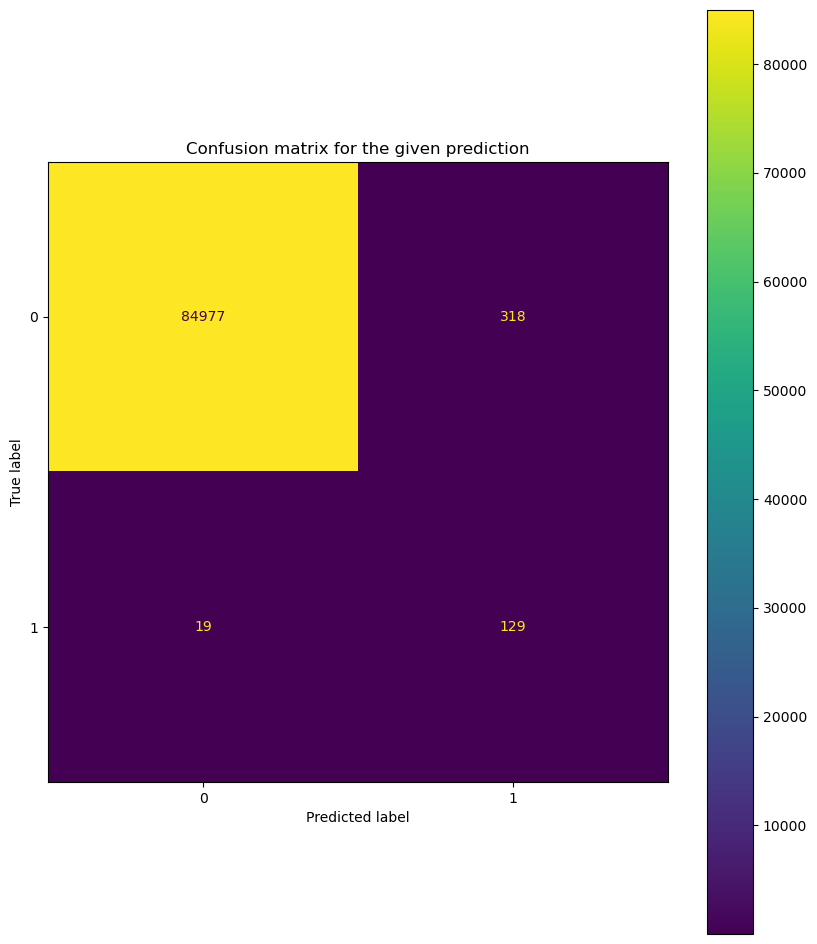

In [47]:
# Model evaluation
evaluation(y_test,y_pred)

#### We observe that Lightgbm still doesn't have a better recall score than logistic regression or Decision tree, even with providing a higher weightage to the positive class. Out of all the models we tried so far, Logistic Regression seems to be working the best.

# Conclusion
* Out of all the models we saw that Logistic Regression worked the best for us in terms of recall score, though the model had a lot of false positives.
* The best method to solve the given problem was applying an oversampling technique(SMOTE) and then applying Logistic regression.
* Tree based models seem to be giving a good f1-score but a poor recall score comparitively
* Boosting methods seem to be performing the best in terms of having the least amount of false positives.